In [1]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV

meow = pd.read_csv(r'C:\Users\maffi\PycharmProjects\Parser\parser-0maffina0\src\career_data.csv')
meow.head(2)

,Name,Season,Age,Team,League,Position,Games,Games Started,Minutes Played Per Game,Field Goals Per Game,...,Offensive Rebounds Per Game,Defensive Rebounds Per Game,Total Rebounds Per Game,Assists Per Game,Steals Per Game,Blocks Per Game,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Awards
0,Kobe Bufkin,2023-24,20,ATL,NBA,SG,17,0,11.5,2.0,...,0.4,1.6,1.9,1.6,0.4,0.3,0.6,1.2,4.8,NaN
1,Kevon Harris,2022-23,25,ORL,NBA,SG,34,0,13.4,1.4,...,0.8,1.2,2.1,0.5,0.5,0.1,0.6,1.6,4.1,NaN


In [2]:
values = {"Field Goal Percentage" : 0, "3-Point Field Goals Percentage" : 0, "2-Point Field Goals Percentage" : 0, "Effective Field Goals Percentage" : 0, "Free Throws Percentage" : 0}
meow.fillna(values, inplace=True)

meow.apply(lambda col: col.astype(str).str.replace(r"(?<!\d)\.", "0.", regex=True))
meow.apply(lambda col: pd.to_numeric(col, errors='ignore'))

meow["Has awards"] = meow["Awards"].notna().astype(int)

meow["Is MVP"] = meow["Awards"].apply(lambda x: 1 if x and 'MVP' in str(x) else 0)
meow["Is MIP"] = meow["Awards"].apply(lambda x: 1 if x and 'MIP' in str(x) else 0)
meow["Is AS"] = meow["Awards"].apply(lambda x: 1 if x and 'AS' in str(x) else 0)
meow["Is DPOY"] = meow["Awards"].apply(lambda x: 1 if x and 'DPOY' in str(x) else 0)
meow["Is CPOY"] = meow["Awards"].apply(lambda x: 1 if x and 'CPOY' in str(x) else 0)
meow["Is NBA"] = meow["Awards"].apply(lambda x: 1 if x and 'NBA' in str(x) else 0)

meow.drop(columns=["League"], inplace=True)

meow["Name"] = pd.factorize(meow["Name"])[0]

meow["Season"] = meow["Season"].str.split("-").str[0].astype(int)

encoder = OrdinalEncoder()
meow[["Team", "Position"]] = encoder.fit_transform(meow[["Team", "Position"]]).astype(int)

meow.drop(columns = ["Awards"], inplace=True)
meow.head(1000)

C:\Users\maffi\AppData\Local\Temp\ipykernel_8344\1729777295.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  meow.apply(lambda col: pd.to_numeric(col, errors='ignore'))


,Name,Season,Age,Team,Position,Games,Games Started,Minutes Played Per Game,Field Goals Per Game,Field Goal Attempts Per Game,...,Turnovers Per Game,Personal Fouls Per Game,Points Per Game,Has awards,Is MVP,Is MIP,Is AS,Is DPOY,Is CPOY,Is NBA
0,0,2023,20,0,9,17,0,11.5,2.0,5.4,...,0.6,1.2,4.8,0,0,0,0,0,0,0
1,1,2022,25,25,9,34,0,13.4,1.4,3.1,...,0.6,1.6,4.1,0,0,0,0,0,0,0
2,1,2023,26,25,9,2,0,3.0,1.0,1.5,...,0.5,1.5,2.0,0,0,0,0,0,0,0
3,2,2022,19,30,2,28,0,14.6,1.6,3.1,...,0.5,2.0,3.9,0,0,0,0,0,0,0
4,2,2023,20,30,2,33,1,12.7,1.7,3.4,...,0.3,1.4,4.4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,169,2023,35,10,4,74,74,32.7,8.8,19.5,...,2.8,1.6,26.4,1,0,0,1,0,1,1
996,170,2021,26,30,0,54,1,10.9,1.9,3.8,...,0.6,1.0,4.9,0,0,0,0,0,0,0
997,170,2022,27,27,0,69,4,14.2,2.6,4.9,...,0.9,1.8,6.6,0,0,0,0,0,0,0
998,170,2023,28,11,0,56,3,13.6,1.9,3.7,...,0.6,1.3,4.9,0,0,0,0,0,0,0


In [3]:
#время строить графики, а я хотела другого, я хотела смотреть "ПОЧЕМУ ЖЕНЩИНЫ УБИВАЮТ"

<Figure size 640x480 with 0 Axes>

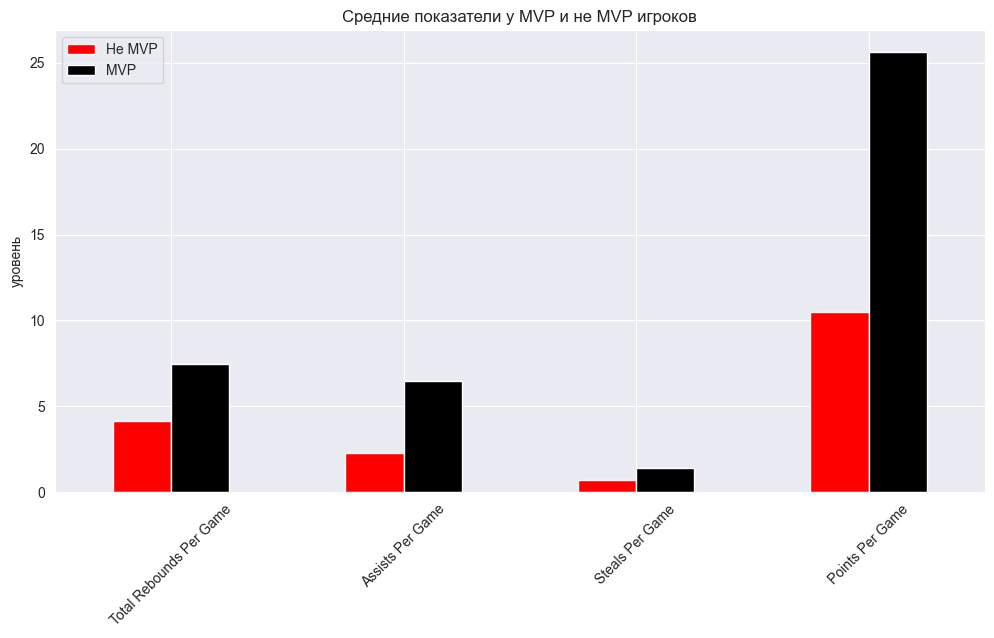

In [4]:
#Total Rebounds Per Game, Assists Per Game, Steals Per Game, Points Per Game, Is MVP
#График, отображающий средние показатели игроков, у которых есть награда MVP, и игроков, у которых её нет.

players_stats = meow.groupby("Is MVP")[["Total Rebounds Per Game", "Assists Per Game", "Steals Per Game", "Points Per Game"]].mean()

plt.figure()
players_stats.transpose().plot(kind = 'bar', figsize = (12, 6), colormap = "flag")
plt.title("Средние показатели у MVP и не MVP игроков")
plt.ylabel("уровень")
plt.xticks(rotation = 45)
plt.legend(["Не MVP", "MVP"])
plt.show()

<Figure size 640x480 with 0 Axes>

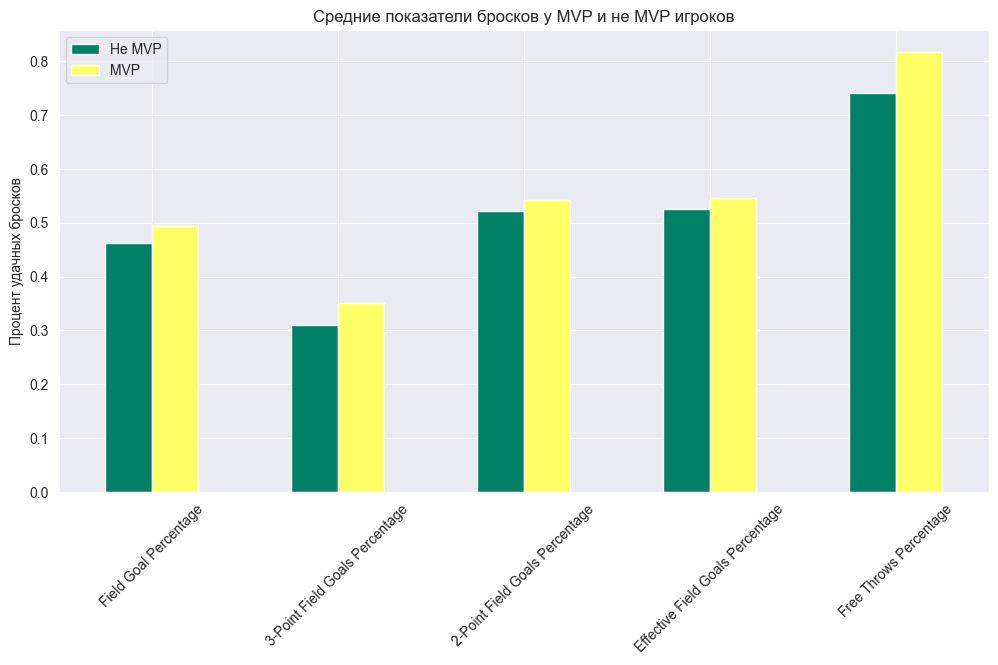

In [5]:
#Field Goal Percentage, 3-Point Field Goals Percentage, 2-Point Field Goals Percentage, Effective Field Goals Percentage, Free Throws Percentage, Is MVP
#График, отображающий средние показатели бросков игроков, у которых есть награда MVP, и игроков, у которых её нет.

players_stats = meow.groupby("Is MVP")[["Field Goal Percentage", "3-Point Field Goals Percentage", "2-Point Field Goals Percentage", "Effective Field Goals Percentage", "Free Throws Percentage"]].mean()

plt.figure()
players_stats.transpose().plot(kind = 'bar', figsize = (12, 6), colormap = "summer")
plt.title("Средние показатели бросков у MVP и не MVP игроков")
plt.ylabel("Процент удачных бросков")
plt.xticks(rotation = 45)
plt.legend(["Не MVP", "MVP"])
plt.show()


<Figure size 640x480 with 0 Axes>

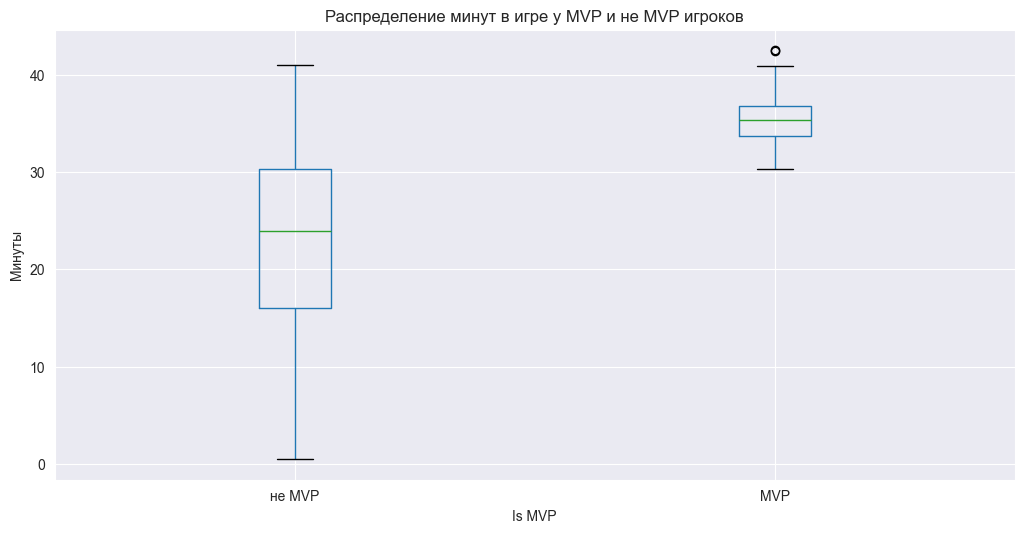

In [6]:
#Minutes Played Per Game, Is MVP
#График, отображающий сколько минут в среднем проводят игроки в игре, в зависимости он наличия награды MVP.

players_stats = meow[["Is MVP", "Minutes Played Per Game"]]

plt.figure()
players_stats.boxplot(column = ["Minutes Played Per Game"], by = "Is MVP",  figsize = (12, 6))
plt.title("Распределение минут в игре у MVP и не MVP игроков")
plt.suptitle("") 
plt.ylabel("Минуты")
plt.xticks([1, 2], ["не MVP", "MVP"], rotation = 0)
plt.show()

<Figure size 640x480 with 0 Axes>

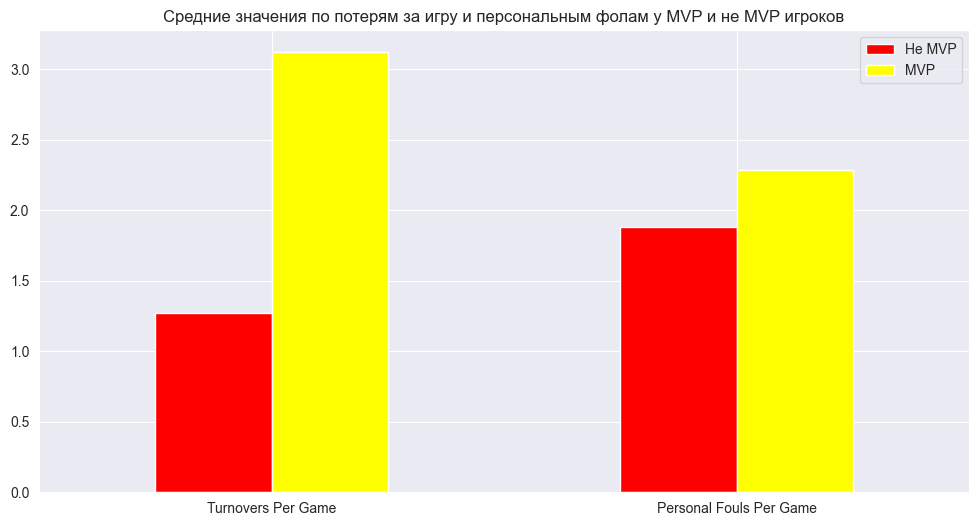

In [7]:
#Turnovers Per Game, Personal Fouls Per Game, Is MVP
#График, отображающий средние значения по потерям за игру и персональным фолам у игроков, у которых есть награда MVP, и игроков, у которых её нет.

players_stats = meow.groupby("Is MVP")[["Turnovers Per Game", "Personal Fouls Per Game"]].mean()

plt.figure()
players_stats.transpose().plot(kind = 'bar', figsize = (12, 6), colormap = "autumn")
plt.title("Средние значения по потерям за игру и персональным фолам у MVP и не MVP игроков")
plt.ylabel("")
plt.xticks(rotation = 0)
plt.legend(["Не MVP", "MVP"])
plt.show()

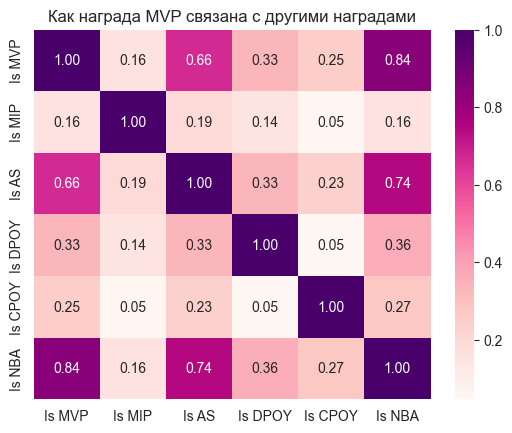

In [8]:
#Is MVP, Is MIP, Is AS, Is DPOY, Is CPOY, Is NBA
#Тепловая корреляция между MVP и другими наградами.

awards = meow[["Is MVP", "Is MIP", "Is AS", "Is DPOY", "Is CPOY", "Is NBA"]].corr()

plt.figure()
sns.heatmap(awards, cmap = "RdPu", annot = True, fmt = ".2f")
plt.title("Как награда MVP связана с другими наградами")
plt.show()

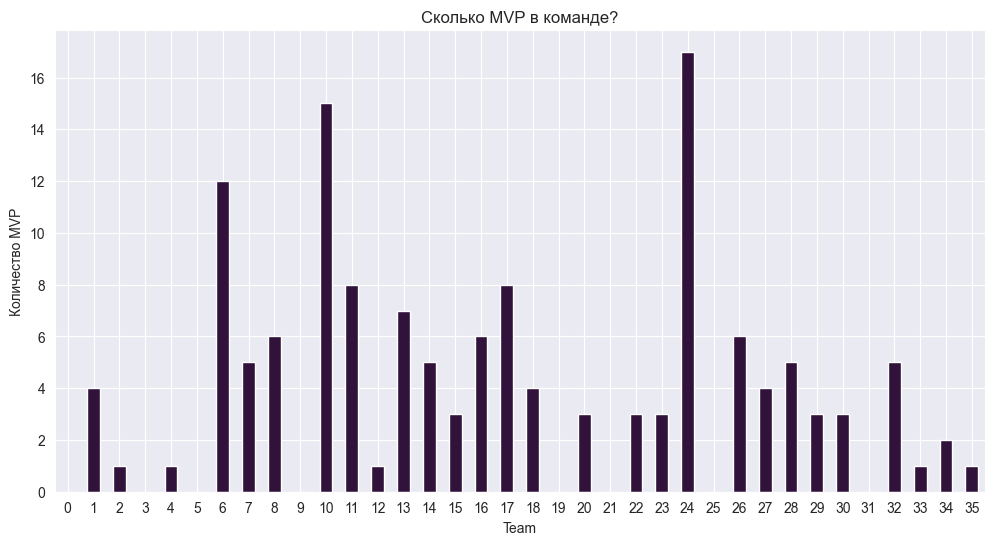

In [9]:
#Team, Is MVP
#График, отображающий количество игроков с наградой MVP в разных командах.

team_mvp_count = meow.groupby("Team")["Is MVP"].sum()

plt.figure()
team_mvp_count.transpose().plot(kind = 'bar', figsize = (12, 6), colormap = "turbo")
plt.title("Сколько MVP в команде?")
plt.ylabel("Количество MVP")
plt.xticks(rotation = 0)
plt.show()

In [10]:
#Реализация baseline
#Ну самое простое и очевидное предположение (исходя из графиков) о том, что в большей степени влияет на то, станет ли игрок MVP или нет, это Points Per Game, так что на этом и будет основан baseline :3

train, test = train_test_split(meow, test_size = 0.2, random_state = 42)

border = train["Points Per Game"].quantile(q = 0.95)
test["Predicted MVP"] = (test["Points Per Game"] >= border)
y_true = test["Is MVP"]
y_predicted = test["Predicted MVP"]

accuracy = accuracy_score(y_true, y_predicted)
precision = precision_score(y_true, y_predicted)
recall = recall_score(y_true, y_predicted)
f1 = f1_score(y_true, y_predicted)
roc_auc = roc_auc_score(y_true, y_predicted)

print(f"Точность (на неё не смотрим, ибо классы не сбалансированны): {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC (а эта штука хорошо подходит для несбалансированной выборки): {roc_auc:.4f}")

Точность (на неё не смотрим, ибо классы не сбалансированны): 0.9528
Precision: 0.5312
Recall: 0.5667
F1-score: 0.5484
ROC-AUC (а эта штука хорошо подходит для несбалансированной выборки): 0.7700


In [11]:
#Страдаем и делаем логистическую регрессию:3
#P.S. Я не хочу.....

X = meow.drop(columns=["Is MVP", "Season"])
y = meow["Is MVP"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

log_reg = LogisticRegression(max_iter = 1000, random_state = 42)
log_reg.fit(X_train_scaled, y_train)

y_train_predicted = log_reg.predict(X_train_scaled)
y_val_predicted = log_reg.predict(X_val_scaled)

def evaluate_model(name, y_truth, y_pred):
    print(f"\n")
    print(f"{name}:")
    print(f"Precision: {precision_score(y_truth, y_pred):.4f}")
    print(f"Recall: {recall_score(y_truth, y_pred):.4f}")
    print(f"F1-score: {f1_score(y_truth, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_truth, y_pred):.4f}")


evaluate_model("Тренировочный секс с ровесницей", y_train, y_train_predicted)
evaluate_model("Валидационный секс с милфой", y_val, y_val_predicted)

#Ну что, мы выбрали модельку (LogR), разбили все на выборки train, vai и test, выполнили стратификацию, обучили модель и посмотрели че и как по успешности обучаемости, с помощью метрик для оценки. Признаков переобучения не видно, а сериал "Почему женщины убивают" я досмотрела (оценка сериала 7,5/10). 
#Пляшем дальшееееее....



Тренировочный секс с ровесницей:
Precision: 0.8803
Recall: 0.9035
F1-score: 0.8918
ROC-AUC: 0.9486


Валидационный секс с милфой:
Precision: 0.9167
Recall: 0.7857
F1-score: 0.8462
ROC-AUC: 0.8911


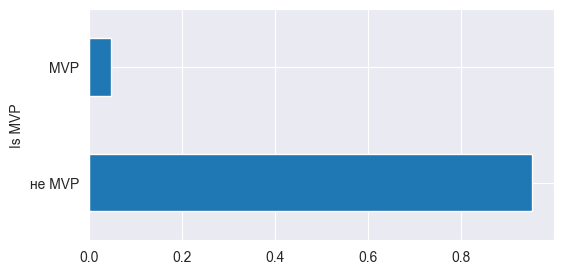

In [12]:
#Мне бы хотелось еще немного объяснить, почему я не использовала accuracy.
#По сути если посмотреть следующий график будет понятно, что классы очень не сбалансированны, а accuracy плохо показывает себя на них.

plt.figure()
y.value_counts(normalize = True).plot(kind = 'barh', figsize = (6, 3))
plt.yticks([0, 1], ["не MVP", "MVP"], rotation = 0)
plt.show()

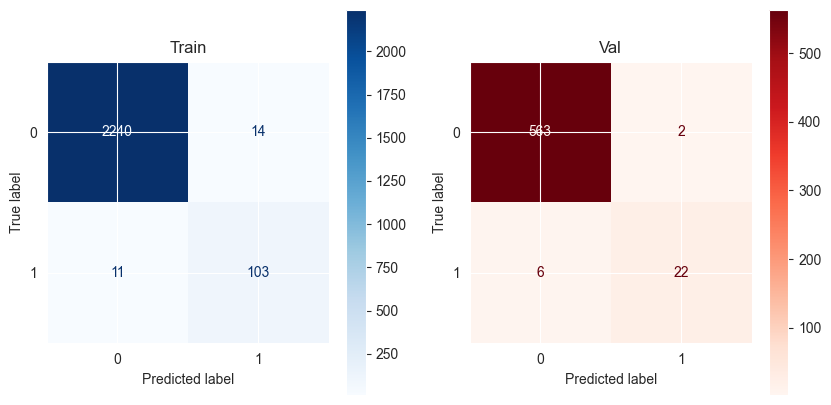

In [13]:
#А теперь глянем что и как там у Precision и Recall:

fig, axes = plt.subplots(1, 2, figsize = (10, 5))

cm_train = confusion_matrix(y_train, y_train_predicted)
disp_train = ConfusionMatrixDisplay(confusion_matrix = cm_train)
disp_train.plot(ax = axes[0], cmap = "Blues")
axes[0].set_title("Train")

cm_val = confusion_matrix(y_val, y_val_predicted)
disp_val = ConfusionMatrixDisplay(confusion_matrix = cm_val)
disp_val.plot(ax = axes[1], cmap = "Reds")
axes[1].set_title("Val")

plt.show()


In [14]:
#Ну а теперь занимаемся подбором гиперпараметров.

param_grid = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2", "elasticnet"],
    "solver": ["liblinear", "saga", "lbfgs"],
    "max_iter": [50, 100, 300, 500, 1000],
    "tol": [1e-4, 1e-3, 1e-2, 1e-1]
}

#Возможно я многовато закинула возможных значений для всяких "C", "penalty" и т.д., ой не знаю, но мне хочется посмотреть, как и что будет, потом мб немного отредактирую и уберу часть, которые возможно совсем бредовыми покажутся (ну если углубиться :3).

grid_search = GridSearchCV(log_reg, param_grid, scoring = "f1", n_jobs = -1, cv = 5, verbose = 1)
grid_search.fit(X_train_scaled, y_train)

#Ну что, чекаем:

print("Гиперпараметры лучшей модели:", grid_search.best_params_)
print("Ошибка, полученная на лучшей модели.:", grid_search.best_score_)

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
Гиперпараметры лучшей модели: {'C': 0.1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}
Ошибка, полученная на лучшей модели.: 0.8639747832939323


C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
2400 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\s

In [15]:
#А теперь учим модельку

super_model = grid_search.best_estimator_

y_train_pred = super_model.predict(X_train_scaled)
y_val_pred = super_model.predict(X_val_scaled)

evaluate_model("Тренировочная выборка с лучшими гиперпараметрами", y_train, y_train_pred)
evaluate_model("Валидационная выборка с лучшими гиперпараметрами", y_val, y_val_pred)



Тренировочная выборка с лучшими гиперпараметрами:
Precision: 0.8015
Recall: 0.9211
F1-score: 0.8571
ROC-AUC: 0.9548


Валидационная выборка с лучшими гиперпараметрами:
Precision: 0.8929
Recall: 0.8929
F1-score: 0.8929
ROC-AUC: 0.9438


In [16]:
#Возможно я что-то делаю не так...по жизни...

In [17]:
#Ну теперь нам надо визуализировать как наша моделька круто учиться, какая она молодец

best_params = {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.01}

precision_array = []
recall_array = []
f1_array = []
roc_auc_array = []
for max_iter in range(1, 15, 1):
    model = LogisticRegression(max_iter = max_iter, random_state = 42, **best_params)
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_val_scaled)
    
    precision = precision_score(y_val, y_pred)
    precision_array.append(precision)
    
    recall = recall_score(y_val, y_pred)
    recall_array.append(recall)
    
    f1 = f1_score(y_val, y_pred)
    f1_array.append(f1)
    
    roc_auc = roc_auc_score(y_val, y_pred)
    roc_auc_array.append(roc_auc)

C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\maffi\PycharmProjects\Parser\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

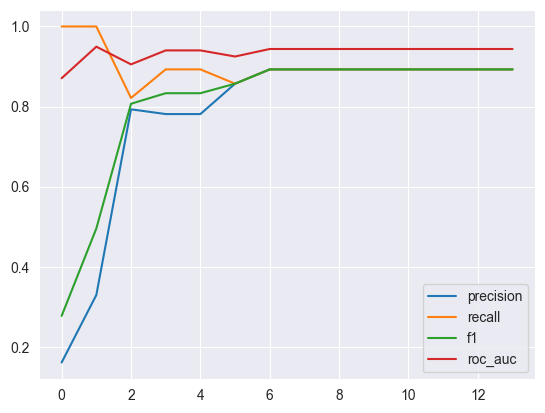

In [18]:
plt.plot(precision_array, label="precision")
plt.plot(recall_array, label="recall")
plt.plot(f1_array, label="f1")
plt.plot(roc_auc_array, label="roc_auc")
plt.legend()
plt.show()

In [19]:
model.coef_

array([[ 0.03421145, -0.04436481,  0.09235134, -0.00635592, -0.0035187 ,
        -0.0972012 , -0.18567767, -0.01440535, -0.03894803, -0.01901577,
        -0.04610577, -0.0464417 , -0.00999254,  0.00193764, -0.02288089,
         0.0261374 , -0.00975232,  0.23178424,  0.21285883, -0.03725993,
        -0.18468675,  0.0634    , -0.01442649,  0.15355114,  0.0833513 ,
        -0.04352654,  0.08566497, -0.20363371,  0.03790501,  0.03773637,
         0.01273164,  0.32429712,  0.15700657,  0.06733909,  0.87507696]])

In [20]:
#Ну......как можно заметь моделька обучается за крайне малое количество итераций, а все из-за 34 признака, который является "Is NBA". На графике тепловой корреляции между MVP и другими наградами мы как раз и видим этого сына собаки - 0,84 (а еще там есть "Is AS").  

In [21]:
#Не знаю есть ли необходимость в том чтобы это фиксить :з